## Basic Linear Regression Model

##### The purpose is to model the relationship between two financial assetes, the price of a single share of Exxon Mobile stock and the price of a barrel of oil. 
##### Question: Does the price of oil (independent variable) do a good job at predicting the a share Exxon Mobile stock (dependent variable)?

In [319]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

In [320]:
# loading the data set.
price_data = pd.read_csv("oil_exxon.csv", index_col = 0)

price_data.head()

,date,exon_price,oil_price
1,28/03/2014,97.70,106.64
2,31/03/2014,97.68,105.95
3,1/04/2014,97.73,105.70
4,2/04/2014,97.95,103.37
5,3/04/2014,97.93,104.88


In [325]:
# Change the data so that date is the index.
price_data.index = pd.to_datetime(price_data['date'])
price_data.head()

/tmp/ipykernel_135/2368485473.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  price_data.index = pd.to_datetime(price_data['date'])


,date,exon_price,oil_price
date,,,
2014-03-28,28/03/2014,97.70,106.64
2014-03-31,31/03/2014,97.68,105.95
2014-04-01,1/04/2014,97.73,105.70
2014-04-02,2/04/2014,97.95,103.37
2014-04-03,3/04/2014,97.93,104.88


In [327]:
#drop the old date column. 
price_data = price_data.drop(['date'], axis = 1)
price_data.head()

,exon_price,oil_price
date,,
2014-03-28,97.70,106.64
2014-03-31,97.68,105.95
2014-04-01,97.73,105.70
2014-04-02,97.95,103.37
2014-04-03,97.93,104.88


In [329]:
# check the data types
price_data.dtypes

exon_price    float64
oil_price     float64
dtype: object

In [331]:
# clean the data- rename columns.
new_column_names ={'exon_price':'exxon_price'}

#rename the column.
price_data = price_data.rename(columns = new_column_names)
price_data.head(2)

,exxon_price,oil_price
date,,
2014-03-28,97.70,106.64
2014-03-31,97.68,105.95


In [332]:
# Handle missing values in csv file.
price_data.isna().any()


exxon_price    False
oil_price       True
dtype: bool

In [334]:
## delete missing values for this project because we can't have NaN in oil price.
price_data = price_data.dropna()
display(price_data.isna().any())

exxon_price    False
oil_price      False
dtype: bool

### Building a Scatterplot

In [338]:
# define the x and y axis.
x = price_data['exxon_price']
y = price_data['oil_price']


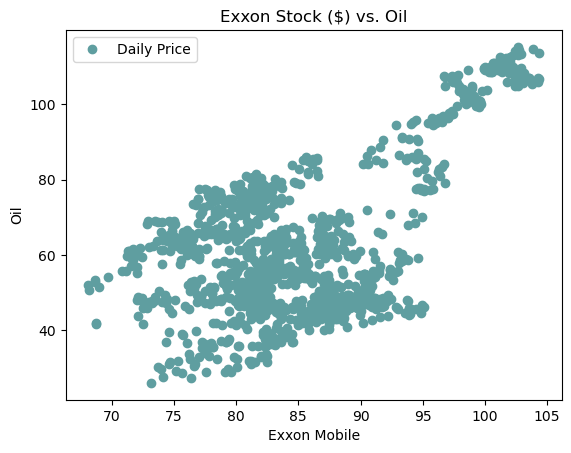

In [339]:
# create the scatterplot.

plt.plot(x,y,'o', color = 'cadetblue', label = 'Daily Price')

# formatting
plt.title('Exxon Stock ($) vs. Oil')
plt.xlabel('Exxon Mobile')
plt.ylabel('Oil')
plt.legend()

plt.show()

In [341]:
### The plot shows, that there is a relationship in the positive direction between the Exxon Stock Price and Oil Price. 

### Measuring the Correlation

In [344]:
price_data.corr()

,exxon_price,oil_price
exxon_price,1.00000,0.60132
oil_price,0.60132,1.00000


In [346]:
### There is a somewhat strong relationship between the two variables.

### What are the key metrics of the data?

In [350]:
# Statistical Summary of the Data.
price_data.describe()

,exxon_price,oil_price
count,1248.000000,1248.000000
mean,84.802796,61.935000
std,7.424687,19.288424
min,68.120000,26.010000
25%,80.190000,48.162500
50%,83.025000,57.120000
75%,88.530000,70.725000
max,104.380000,115.190000


array([[<Axes: title={'center': 'exxon_price'}>,
        <Axes: title={'center': 'oil_price'}>]], dtype=object)

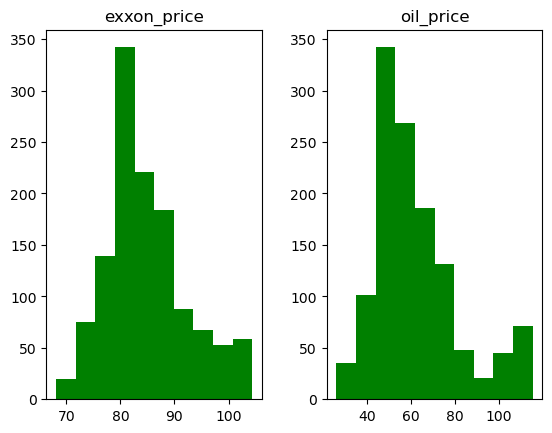

In [351]:
# What is the distribution of the dataset? 
price_data.hist(grid= False, color = 'green')

In [353]:
## The data looks slightly skewed to the left. 

In [354]:
# What is the kurtosis/ sharpness of the peaks?
exxon_kurtosis = stats.kurtosis(price_data['exxon_price'], fisher=True)
oil_kurtosis = stats.kurtosis(price_data['oil_price'], fisher=True)

# Calculate the skewness.
exxon_skew = skew(price_data['exxon_price'])
oil_skew = skew(price_data['oil_price'])


In [358]:
print('Exxon Kurtosis: {:.2}'.format(exxon_kurtosis))
print('Oil Kurtosis: {:.2}'.format(oil_kurtosis))

Exxon Kurtosis: 0.088
Oil Kurtosis: 0.53


#### Kurosis Metrics
* kurtosis = 3 (excess = 0) is mesokurtic and represents the normal distribution
* kurtosis <3 (excess <0) is platykurtic and has the broad peaks with shorter tails.
* kurtosis >3 (excess >0) is leptokurtic and the peak is sharp and tails are longer.

In [361]:
## results fall within the mesokurtic- exxon kurtosis and slightly platykurtic- oil.

In [363]:
print('Exxon Skew: {:.2}'.format(exxon_skew))
print('Oil Skew: {:.2}'.format(oil_skew))

Exxon Skew: 0.66
Oil Skew: 1.0


#### Skewness Metrics
* skewness <-1 or > +1, it has a highly skewed distribution.
* skewness b/w -1 & -1/2 or b/w +1/2 & +1, it is moderately skewed.
* skewness b?w -1/2 & +1/2, it is approx. symetric.

In [366]:
## The results show that the exxon skew is moderately skewed but the oil price is highly skewed.

In [367]:
### Perform kurtosis tests. 

display('Exxon: ')
display(stats.kurtosistest(price_data['exxon_price']))
display('Oil: ')
display(stats.kurtosistest(price_data['oil_price']))

'Exxon: '

KurtosistestResult(statistic=0.7185341775413723, pvalue=0.4724279822369689)

'Oil: '

KurtosistestResult(statistic=3.193868719980946, pvalue=0.0014037993965471192)

#### What does it mean?
##### The p-value for Exxon was at 0.47 which is greater than the set p-value of p= 0.05. Therefore, the null hypothesis is not rejected. The p=value for oil price is 0.001 < 0.05, therefore reject the null hypothesis and accept the alternative hypothesis. 
##### H0 = kurtosis of the population is of the normal distribution but the H1 = kurtosis isn't of normal distribution. 


In [371]:
### Perform skew tests

display('Exxon: ')
display(stats.skewtest(price_data['exxon_price']))

display('Oil: ')
display(stats.skewtest(price_data['oil_price']))


'Exxon: '

SkewtestResult(statistic=8.770169133017768, pvalue=1.783981085247459e-18)

'Oil: '

SkewtestResult(statistic=12.471137868018896, pvalue=1.0728306198159925e-35)

#### What does it mean?
##### The p-value for Exxon was at 1.78 which is greater than the set p-value of p= 0.05. Therefore, the null hypothesis is not rejected. The p=value for oil price is 1.07>0.05, therefore the null hypothesis is also not rejected.

##### H0 = the skewness of the population is of the normal distribution but the H1 = skewness isn't of normal distribution. 


### Building the Model- Machine Learning

In [390]:
## Defining the variables.

Y = price_data.drop("oil_price", axis =1)
X = price_data[["oil_price"]]

In [392]:
## Split X and Y training sets @ 30% testing and 70% training.

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=1)

In [394]:
## Create the linear regression model.
regression_model = LinearRegression()

## Fit the model.
regression_model.fit(X_train, y_train)

LinearRegression()

In [396]:
## Find the y-intercept of the model.

intercept = regression_model.intercept_[0]
print("The intercept of our model is: {:.3}".format(intercept))

The intercept of our model is: 70.0


In [398]:
## Find the coefficent (slope) of the model.

coefficent = regression_model.coef_[0][0]
print("The coefficent of our model is: {:.2}".format(coefficent))

The coefficent of our model is: 0.24


In [400]:
## Test a single prediction. 

prediction = regression_model.predict([[67.33]])
predicted_value = prediction[0][0]
print("The predicted value {:.4}".format(predicted_value))

The predicted value 85.95


/opt/conda/envs/anaconda-2023.09/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [402]:
## Make multiple predictions at once.

y_predict = regression_model.predict(X_test)

# Show the first 5 predictions. 

y_predict[:5]

array([[82.23530255],
       [82.87451027],
       [81.4824579 ],
       [78.925627  ],
       [84.013247  ]])

### Evaluate the Model

In [405]:
# define our input.
X2= sm.add_constant(X)

# create the ordinary least squares model.
model = sm.OLS(Y, X2)

In [407]:
# fit the data
est = model.fit()

In [409]:
# Create the confidence interval with a 95% CI

est.conf_int()

,0,1
const,69.358126,71.57579
oil_price,0.214372,0.24856


In [411]:
# Hypothesis Testing via. p-value.
est.pvalues

const         0.000000e+00
oil_price    1.423518e-123
dtype: float64

### Model Fit

In [413]:
# Calculation of the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)
print("The MSE is: {:.3}".format(model_mse))

The MSE is: 38.4


In [415]:
# Calculation of the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)
print("The MAE is: {:.3}".format(model_mae))

The MAE is: 5.03


In [417]:
# Calculate the root mean squared error
model_rmse = math.sqrt(model_mse)
print("The RMSE is: {:.3}".format(model_rmse))

The RMSE is: 6.2


In [419]:
## Calculate the R-Squared.
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.31


In [421]:
## Summary of the Model Output
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:            exxon_price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     705.7
Date:                Fri, 18 Oct 2024   Prob (F-statistic):          1.42e-123
Time:                        21:00:35   Log-Likelihood:                -3992.3
No. Observations:                1248   AIC:                             7989.
Df Residuals:                    1246   BIC:                             7999.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.4670      0.565    124.678      0.0

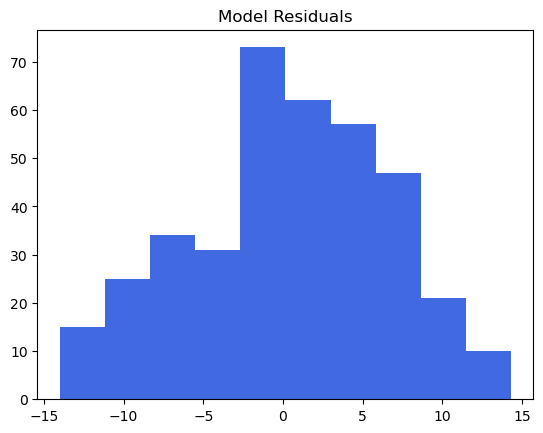

In [423]:
## Plot the residuals and create the histogram.
(y_test - y_predict).hist(grid = False, color = 'royalblue')
plt.title("Model Residuals")
plt.show()

### Plotting the Data

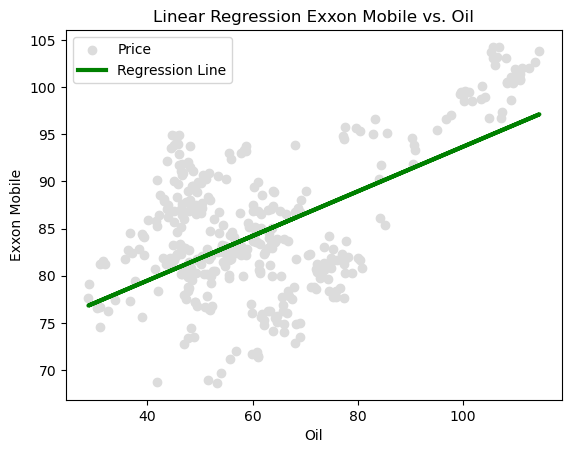

In [426]:
# Plot outputs

plt.scatter(X_test, y_test, color="gainsboro", label= "Price")
plt.plot(X_test, y_predict, color="green", linewidth = 3, linestyle = "-", label = "Regression Line")

plt.title("Linear Regression Exxon Mobile vs. Oil")
plt.xlabel("Oil")
plt.ylabel("Exxon Mobile")
plt.legend()
plt.show()


In [448]:
# The coeffcients.
print("The oil coefficents: " + "\033[1m" + "{:.4}" "\033[0m".format(regression_model.coef_[0][0]))


The oil coefficents: 0.2367


In [450]:
# The mean squared error.
print("Mean squared error: " + "\033[1m" + "{:.4}" "\033[0m".format(model_mse))


Mean squared error: 38.44


In [451]:
# The root mean squared error.
print("Root mean squared error: " + "\033[1m" + "{:.4}" "\033[0m".format(math.sqrt(model_mse)))

Root mean squared error: 6.2


In [453]:
# Explain the variance score: 1 is the perfect prediction.
print("R^2 score: " + "\033[1m" + "{:.2}" "\033[0m".format(r2_score(y_test,y_predict)))

R^2 score: 0.31


#### Save the Model

In [457]:
import pickle

In [458]:
# save the model via pickle.

with open("my_linear_regression.sav","wb") as f:
    pickle.dump(regression_model,f)

In [460]:
# load it back in.

with open("my_linear_regression.sav","rb") as pickle_file:
    regression_model_2 = pickle.load(pickle_file)

In [462]:
# make a new prediction
regression_model_2.predict([[67.33]])

/opt/conda/envs/anaconda-2023.09/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[85.94980966]])